# Lab Enhancement: Principal Component Analysis (PCA)
## Group 19

### Application of Principal Component Analysis (PCA)
- Image Data Compression Using PCA
- Noise Reduction Using PCA


##  Introduction of Principal Component Analysis

Principal Component Analysis (PCA) is a linear dimensionality reduction method that identifies a new set of orthogonal axes, called principal components, in the data. These components capture the maximum variance in the dataset. PCA is widely employed for visualizing high-dimensional data and compressing it without significant loss of information. PCA is a powerful technique used for **dimensionality reduction** and **feature extraction**, particularly useful for high-dimensional data like images, text, and sensor readings.


1. Dimensionality Reduction

  Dimensionality reduction techniques are essential tools in data analysis, aiming to simplify complex datasets by reducing the number of features while retaining as much useful information as possible. The need for dimensionality reduction arises from the challenges posed by high-dimensional data, which can be difficult to analyse, visualise, and store efficiently. Moreover, as the number of features increases, algorithms often require exponentially more data to maintain their effectiveness, a problem commonly known as the "curse of dimensionality."

2. Feature Extraction

  Feature extraction is a fundamental process in data analysis that involves creating new features from existing ones, with the goal of capturing underlying patterns and relationships within the data. The aim is to enhance the representation of the data by generating more powerful and meaningful features that better encapsulate the relevant information for analysis. This process is crucial because existing features may not fully capture the complexities and nuances present in the dataset, necessitating the creation of more informative features.

## What does PCA do?

Here are the steps involved in performing Principal Component Analysis (PCA):

1. Data Standardization:

  Before applying PCA, it's crucial to standardize the data. This ensures that features with different units or scales contribute equally to the analysis. Standardization usually involves subtracting the mean from each feature and then dividing by its standard deviation.
2. Covariance Matrix Computation:

  The covariance matrix captures the linear relationships between different features. It's calculated by measuring how much each feature varies with respect to the others.
3. Eigenvalue and Eigenvector Decomposition:

  The covariance matrix is decomposed into its eigenvalues and eigenvectors. Eigenvalues represent the variance captured by each principal component, while eigenvectors represent the directions of these components.
4. Selecting Principal Components:

  Since the eigenvalues are arranged in descending order, the first few components usually capture the most significant variance in the data. You choose the number of principal components to retain based on the desired level of information preservation and dimensionality reduction.
5. Data Transformation:

  Finally, the original data is projected onto the chosen principal components, creating a new dataset with reduced dimensionality. This new dataset retains the most important information from the original data while discarding less relevant information.


## What are the benefits of using PCA?
- Simplified data analysis: Lower dimensionality makes data easier to visualise, understand, and interpret.
- Improved algorithm performance: Many machine learning models struggle with high dimensions. PCA reduced dimensionality, often leading to better performance.
- Noise reduction: By focusing on high variance directions, PCA can filter out irrelevant information and noise in the data.
- Feature extraction: The extracted PCs often represent meaningful aspects of the data, providing valuable insights for further analysis.



## Applications of PCA
1. Image compression:
  
  PCA reduces image dimensionality while retaining essential information. It helps create compact representations of images, making them easier to store and transmit.
2. Data visualization:
  
  PCA helps to visualize high-dimensional data by projecting it into a lower-dimensional space, such as a 2D or 3D plot. This simplifies data interpretation and exploration.
3. Noise filtering:

  PCA can remove noise or redundant information from data by focusing on the principal components that capture the underlying patterns.

## Some common terms used in this chapter include:
  1. Dimensionality: It is the number of features or variables present in the given dataset. More easily, it is the number of columns present in the dataset.
  2. Correlation: It signifies how strongly two variables are related to each other. Such as if one changes, the other variable also gets changed. The correlation value ranges from -1 to +1. Here, -1 occurs if variables are inversely proportional to each other, and +1 indicates that variables are directly proportional to each other.
  3. Orthogonal: It defines that variables are not correlated to each other, and hence the correlation between the pair of variables is zero.
  4. Eigenvectors: If there is a square matrix M, and a non-zero vector v is given. Then v will be an eigenvector if Av is the scalar multiple of v.
  5. Covariance Matrix: A matrix containing the covariance between the pair of variables is called the Covariance Matrix.


  In this lab, we will focus on two PCA applications which are:
  - Image Data Compression Using PCA
  - Noise Reduction Using PCA

References:
1. https://www.kaggle.com/code/mirzarahim/introduction-to-pca-image-compression-example
2. https://www.kaggle.com/code/shivamchaudhary11/apply-pca-and-removal-of-noise-on-digits-dataset


### Import Libraries

In [4]:
#### IMPORT LIBRARY ###

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image
from google.colab import files
from sklearn.cluster import KMeans
from matplotlib.image import imread

### Application 1: Image Data Compression Using PCA

Images are inherently high-dimensional due to the large number of pixels. PCA can be used to compress images efficiently without losing significant visual quality.

Saving image1.jpg to image1.jpg
(960, 1280, 3)


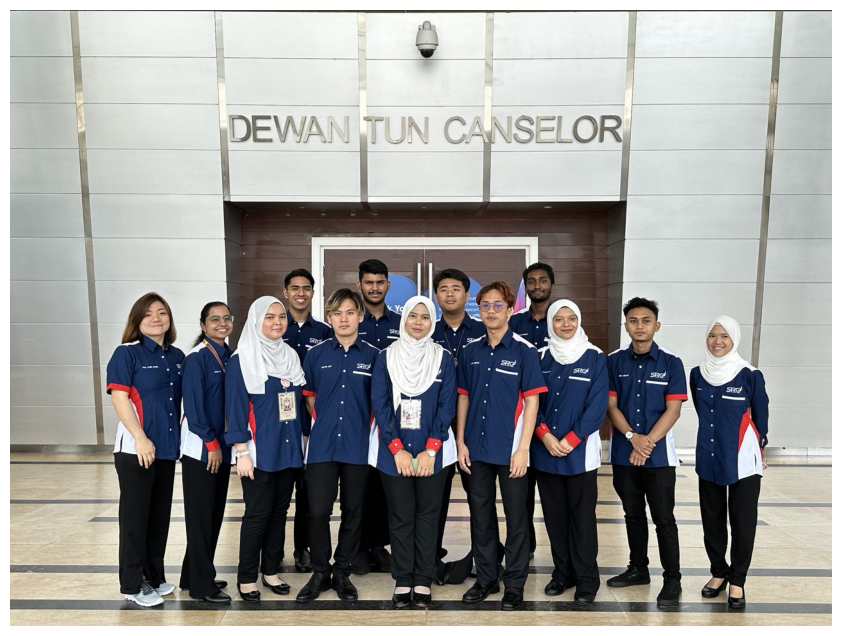

In [7]:
# Get Image Data (Two Methods) - Comment out the unused part

# 1) Uploading the image file in Google Collab - Comment out the unused part
uploaded = files.upload()

# Get and read the uploaded image
file_name = next(iter(uploaded))
image_raw = Image.open(file_name)

# Convert the image to numpy array
image_raw = np.array(image_raw)
print(image_raw.shape)

# Displaying the image
plt.figure(figsize=[12,8])
plt.imshow(image_raw)
plt.axis('off')  # Turn off axis
plt.show()

## 2) Accessing image from file in device - Comment out the unused part

## Using raw string literals to specify the file path
# image_raw = imread(r"C:\Users\zafir\Documents\MMU\BCS_Year3\ML\image1.jpg") #change the path

# print(image_raw.shape)

## Displaying the image
# plt.figure(figsize=[12,8])
# plt.imshow(image_raw)
# plt.show()




### Convert to Grayscale Image

(960, 1280)
1.0


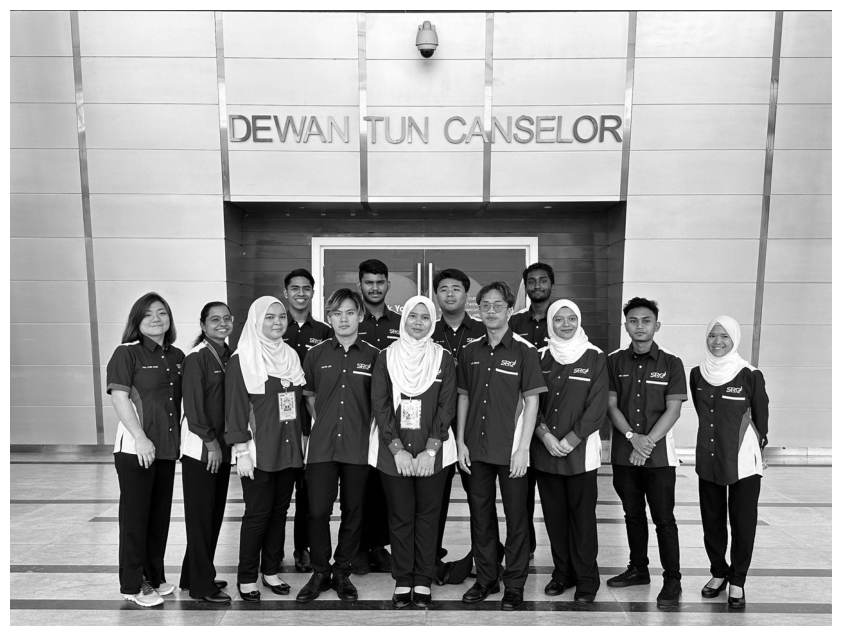

In [8]:
# Convert to grayscale image
image_sum = image_raw.sum(axis=2)  # Sum across the color channels to get grayscale
print(image_sum.shape)  # Print the shape of the grayscale image

# Normalize the grayscale image
image_bw = image_sum / image_sum.max()
print(image_bw.max())  # Print the maximum value of the normalized grayscale image

# Plotting the grayscale image
plt.figure(figsize=[12,8])
plt.imshow(image_bw, cmap='gray')  # Specify colormap as 'gray' for grayscale
plt.axis('off')  # Turn off axis
plt.show()

### Perform PCA on the Image


Number of components explaining 95% variance: 34


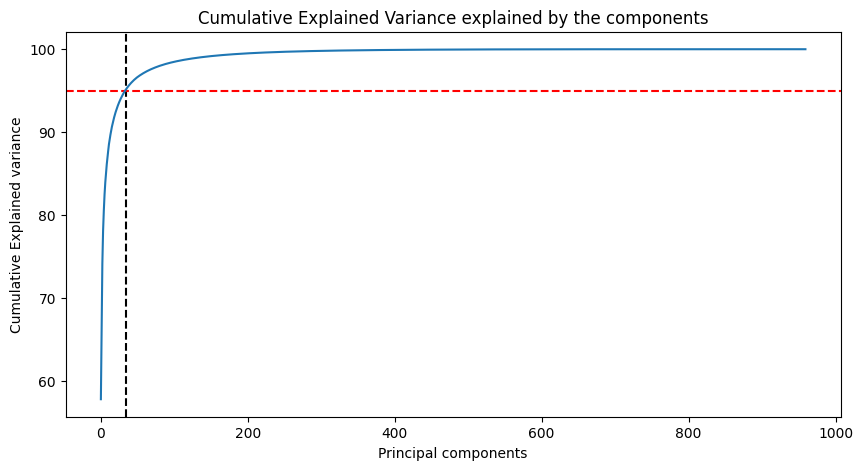

In [9]:
from sklearn.decomposition import PCA, IncrementalPCA

# Perform PCA
pca = PCA()
pca.fit(image_bw)  # Fit PCA to the data

# Getting the cumulative variance
var_cumu = np.cumsum(pca.explained_variance_ratio_) * 100  # Calculate cumulative explained variance

# How many PCs explain 95% of the variance?
k = np.argmax(var_cumu > 95)  # Find the index where cumulative variance exceeds 95%
print("Number of components explaining 95% variance: " + str(k))  # Print the number of components

# Plotting cumulative explained variance
plt.figure(figsize=[10, 5])
plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")  # Vertical line indicating the number of components explaining 95% variance
plt.axhline(y=95, color="r", linestyle="--")  # Horizontal line at 95% explained variance
ax = plt.plot(var_cumu)  # Plot cumulative explained variance

# Incremental PCA
ipca = IncrementalPCA(n_components=k)  # Initialize IncrementalPCA with the number of components
image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))  # Reconstruct image using IncrementalPCA

### Recronstruct the Image

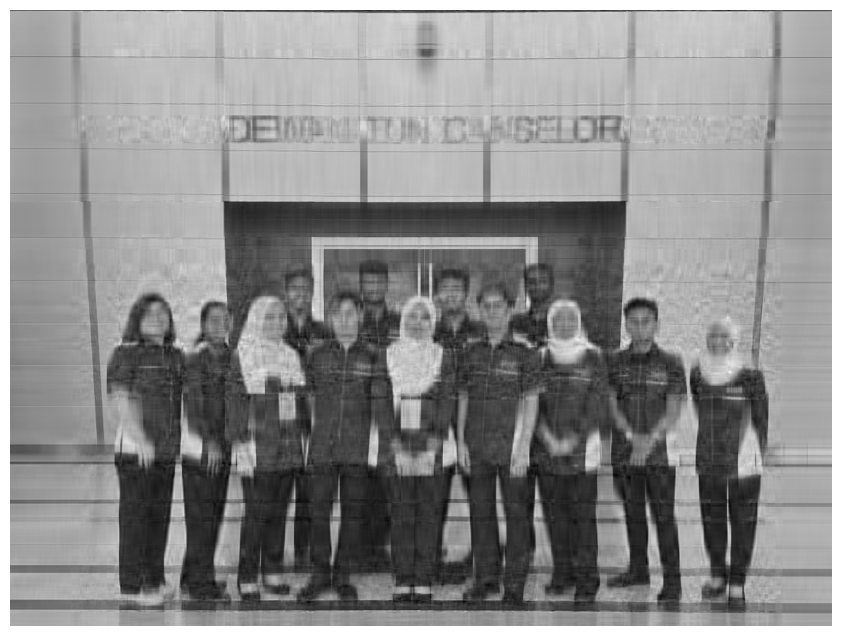

In [10]:
# Incremental PCA
ipca = IncrementalPCA(n_components=k)  # Initialize IncrementalPCA with the number of components
image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))  # Reconstruct the grayscale image

# Plotting the reconstructed image
plt.figure(figsize=[12, 8])
plt.imshow(image_recon, cmap=plt.cm.gray)  # Display the reconstructed image with grayscale colormap
plt.axis('off')  # Turn off axis
plt.show()

### Reconstruct Using Different Number of Components

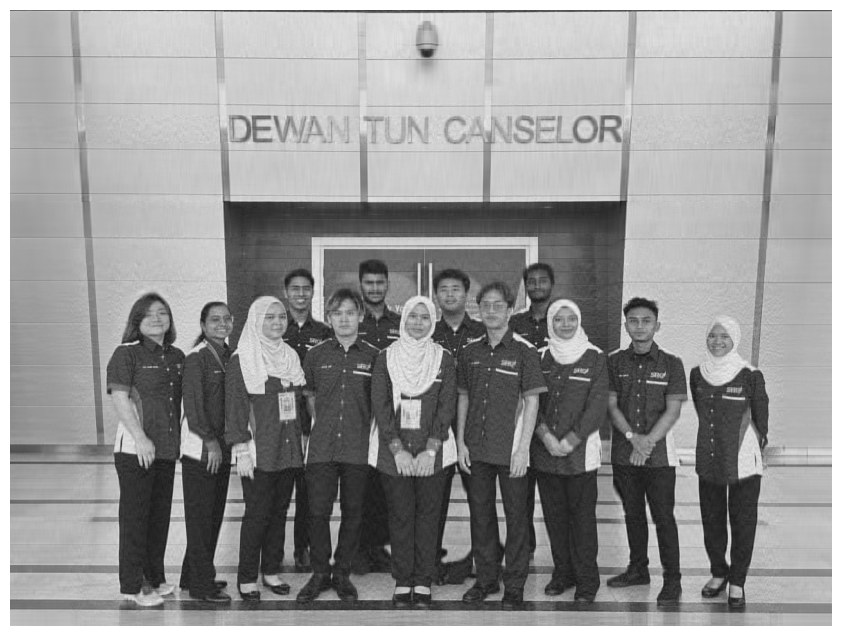

In [11]:
# Function to reconstruct and plot image for a given number of components
def plot_at_k(k):
    ipca = IncrementalPCA(n_components=k)
    image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))
    plt.imshow(image_recon, cmap=plt.cm.gray)
    plt.axis('off')  # Turn off axis

# Define the number of components
k = 100

# Create the plot
plt.figure(figsize=[12, 8])
plot_at_k(k)  # Call the function with k=100
plt.show()  # Show the plot

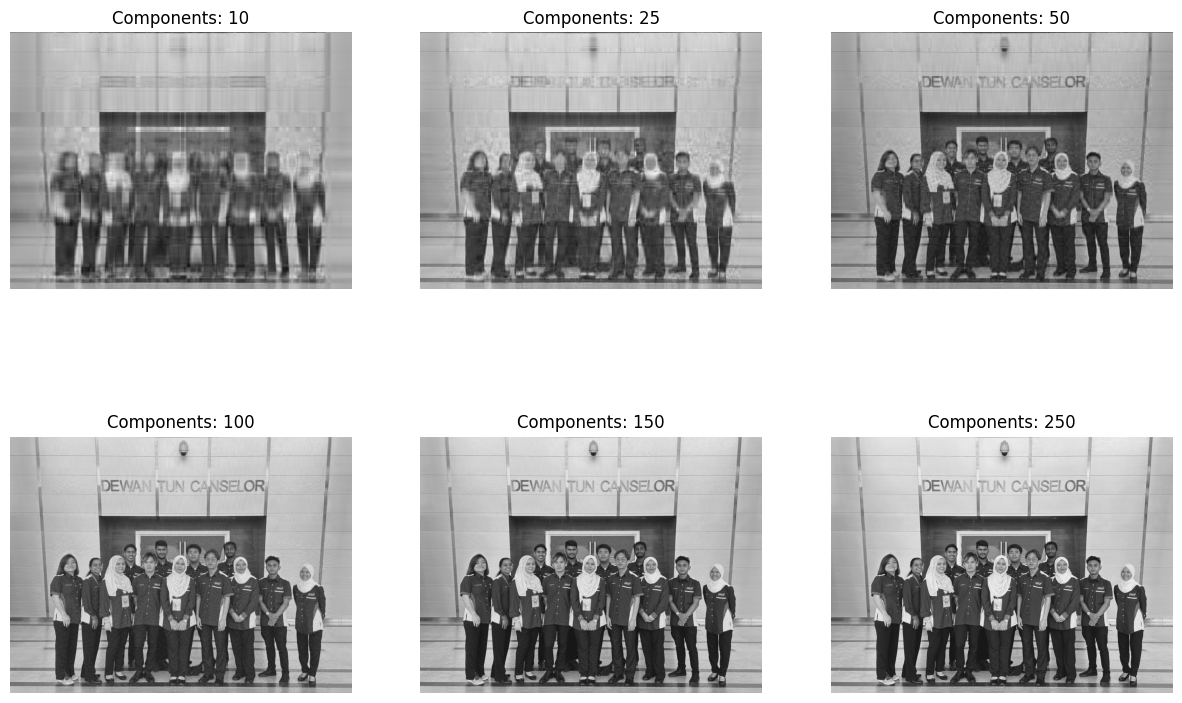

In [12]:
# Define a list of numbers of components
ks = [10, 25, 50, 100, 150, 250]

# Create a figure with a grid of subplots
plt.figure(figsize=[15, 9])

# Iterate over the range of values in ks
for i in range(6):
    plt.subplot(2, 3, i+1)  # Create subplot
    plot_at_k(ks[i])  # Call the function plot_at_k with ks[i]
    plt.title("Components: " + str(ks[i]))  # Set subplot title

plt.subplots_adjust(wspace=0.2, hspace=0.4)  # Adjust the spacing between subplots
plt.show()  # Show the plot

### Application 2: Noise Reduction Using PCA
Real-world data often contains noise or irrelevant information. PCA can help reduce this noise by focusing on the directions of maximum variance, which typically represent the underlying signal.

### Loading data

In [13]:
# Loads the handwritten digits dataset from the sklearn.datasets module
from sklearn.datasets import load_digits

# Contains images of handwritten digits and their corresponding labels
digits = load_digits()

# Print and provides information about the dimensions of the dataset
print(digits.data.shape)

(1797, 64)


In [14]:
# Importing PCA from sklearn.decomposition for dimensionality reduction
from sklearn.decomposition import PCA

# Initializing PCA to reduce dimensions from 64 to 2
pca = PCA(2)

# Fitting PCA to digits data and transforming to 2-dimensional space
projected = pca.fit_transform(digits.data)

# Printing original data shape and transformed data shape
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


### Plotting the Scatter Plot

(Text(0.5, 0, 'Component 1'),
 Text(0, 0.5, 'Component 2'),
 <matplotlib.colorbar.Colorbar at 0x7827c3362ce0>)

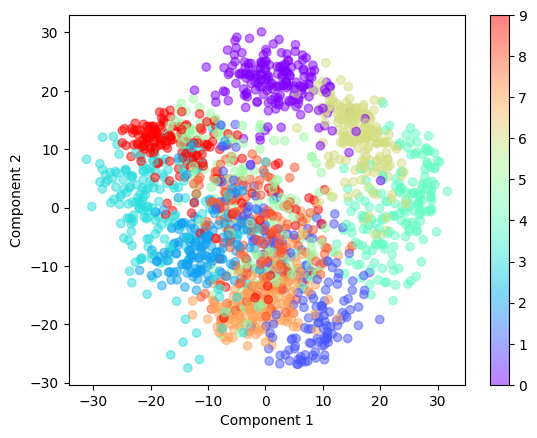

In [15]:
# Scatter plot of transformed data with color representing target labels
plt.scatter(projected[:, 0], projected[:, 1], c=digits.target, alpha=0.5, cmap='rainbow')

# Adding axis labels and colorbar
plt.xlabel('Component 1'), plt.ylabel('Component 2'), plt.colorbar()

(Text(0.5, 0, 'Number of Components'),
 Text(0, 0.5, 'Cumulative Explained Variance'))

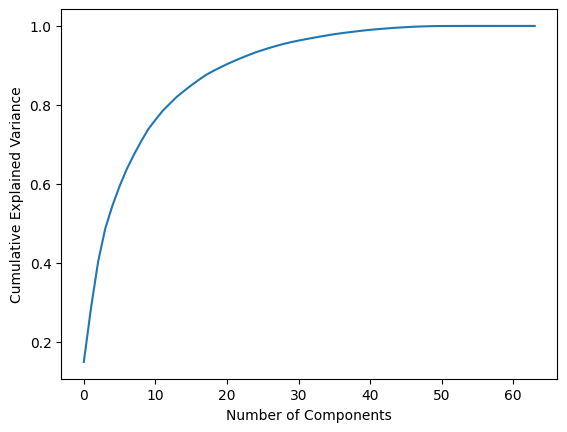

In [16]:
# Applying PCA to the data without specifying the number of components
pca = PCA().fit(digits.data)

# Plotting the cumulative explained variance ratio
# The cumulative explained variance ratio indicates the proportion of variance explained by each additional component
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# Adding labels to the x-axis and y-axis
plt.xlabel('Number of Components'), plt.ylabel('Cumulative Explained Variance')

### Visualizing Data Without Noise

In [17]:
# Applying PCA with 35 components to the digits data and transforming it
pca = PCA(35).fit_transform(digits.data)

# Printing the shape of the original digits data array
# This provides information about the dimensions of the original dataset
print(digits.data.shape)

(1797, 64)


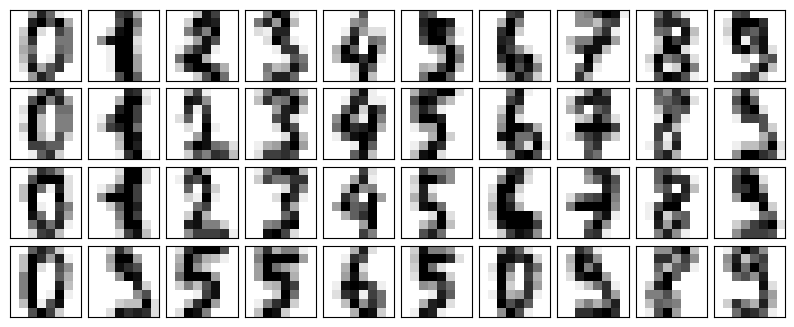

In [18]:
# Define a function to plot digits
def plot_digits(data):

    # Create subplots with 4 rows and 10 columns
    fig, axes = plt.subplots(4, 10, figsize=(10, 4), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))

    # Loop through each subplot
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8), cmap='binary') # Plot each digit as an image

# Call the function to plot the digits data
plot_digits(digits.data)


### Adding Noise to the Data

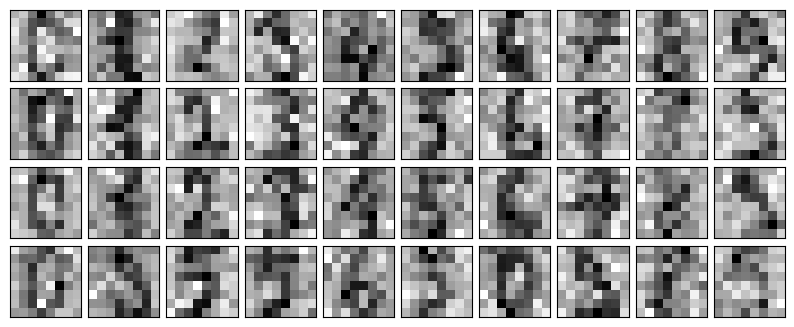

In [19]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate noisy versions of digit images by adding normal distributed noise
noisy = np.random.normal(digits.data, 4)

# Plot the noisy digit images
plot_digits(noisy)

### Filtering Data Without Noise

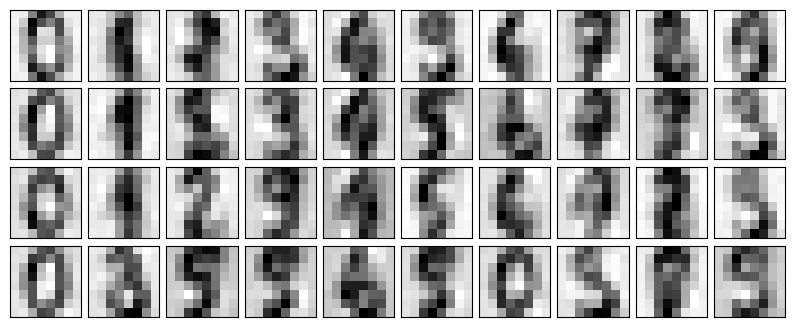

In [20]:
# Initialize PCA with 6 components and fit it to the noisy data
pca = PCA(6).fit(noisy)

# Get the number of components used by PCA
pca.n_components_

# Transform the noisy data into the PCA space
components = pca.transform(noisy)

# Reconstruct the filtered images from the transformed components
filtered = pca.inverse_transform(components)

# Plot the filtered images
plot_digits(filtered)

# END.